# Constrained Optimization

_**[Power Systems Optimization](https://github.com/east-winds/power-systems-optimization)**_

_by Michael R. Davidson and Jesse D. Jenkins (last updated: August 30, 2021)_

This notebook will introduce the concept of constrained optimization--that is, an optimization model consisting of an objective function (something to minimize or maximize), decision variables (variables we can adjust), and constraints (limitations on the values of the decision variables).

## Factory example

Let's begin with a simple example. You own a factory that can produce two types of widgets: 

**Widget A** generates a profit of $\pi_A=$ \$150 per widget. 

**Widget B** generates a profit of $\pi_B=$ \$175 per widget. 

We cannot produce a negative amount of widgets ("non-negativity constraints"). 

Our goal is to *maximize* total revenue $\pi_A x + \pi_B y$.  We call this our **objective function**.

This gives us the following simple problem:

$$
\begin{align}
\max f(x,y) = \ & 150 x + 175 y\\
\text{s.t.} & \\
 & x \geq 0 \\
 & y \geq 0
\end{align}
$$

As $x$ and $y$ are the variables describing the quantity of widget A and widget B to produce to maximize our objective function, we call these our **decision variables**.

In [29]:
# Before you use a package in Julia for the first time, you must "add" (install) it. 
# You may comment out this line for subsequent runs:
#import Pkg; Pkg.add("Plots") 
using Pkg
#Pkg.add("Plots")
Pkg.add("Plots")
using Plots
# uncomment if you wish to use the plotly backend (currently has a bug as of September 2023)
# plotly() # use plotly backend: https://docs.juliaplots.org/latest/generated/plotly/

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]


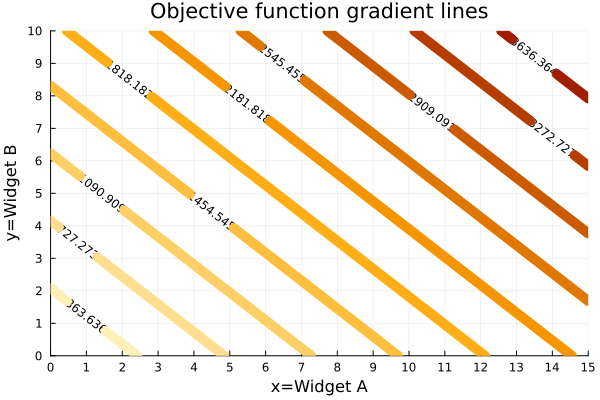

In [30]:
# set up parameters and variables
pa = 150
pb = 175
x = range(0,15,step=0.5)
y = range(0,10,step=0.5)
println(collect(x))
# define objective function
f(x, y) = begin  (pa*x + pb*y)  end 

contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
title!("Objective function gradient lines")

But, wait. We could just increase the objective function indefinitely by ramping up production of A and B. There is no maximum profit. This is an example of an **unbounded problem**. 

## Adding material constraints

Suppose that A and B both require a material input M: A requires 7 units of M / widget. B requires 11 units of M / widget. Furthermore, there is a limited supply of material M: 77 units. This leads to the following material constraint:

$$
7 x + 11 y \leq 77
$$

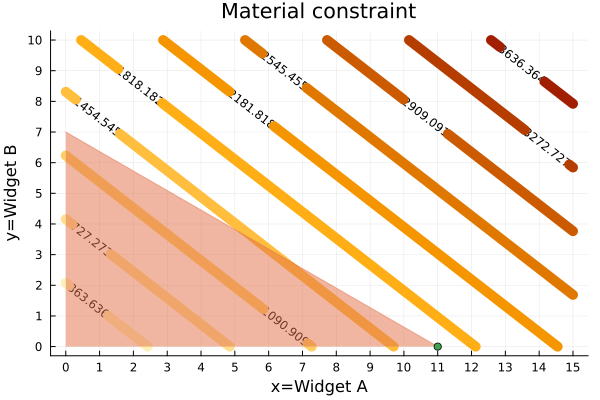

In [31]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("Material constraint")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.5)
scatter!([11],[0])

The best we can do in this case--seen above:
- 11 widgets of A
- 0 widgets of B

Using the objective function f(x,y) = ($150 x + 175 y$), we can calculate the resulting revenue at ($x^*, y^*$):

In [32]:
@show f(11,0);

f(11, 0) = 1650


## Adding capacity constraints

Now, suppose we have a capacity limit on how much of widget A we can produce in our factory: we are limited to produce 8 units of A. This results in a capacity constraint:

$$
x \leq 8
$$

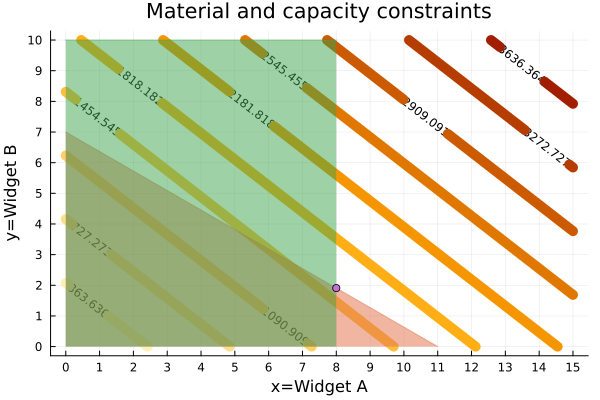

In [33]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("Material and capacity constraints")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.5)
areaplot!(x[x.<=8], repeat([maximum(y)],length(x[x.<=8])), legend=false, opacity=0.5)
scatter!([8],[(77 - 7*8)/11])

The best we can do in this case--seen above:
- 8 widgets of A
- 1.9 widgets of B

This will result in revenue:

In [34]:
f(11,(77 - 7*8)/11)

1984.090909090909

## Time constraints

Now let us imagine that we are optimizing factory production for a week, and A and B require different amounts of time to produce. A requires 10 hours / widget. B requires 8 hours / widget. Furthermore, the "supply" of time is limited to 80 hours / week. This leads to the following time constraint:

$$
10 x + 8 y \leq 80
$$

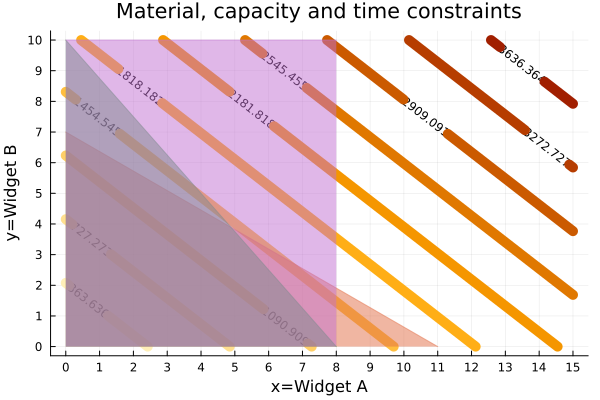

In [35]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("Material, capacity and time constraints")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.5)
areaplot!(x[x.<=8], (80 .- 10*x[x.<=8])./8, legend=false, opacity=0.5)
areaplot!(x[x.<=8], repeat([maximum(y)],length(x[x.<=8])), legend=false, opacity=0.5)

## Feasible region

We can now see that the **feasible region**, or *the area that simultaneously satisfies all constraints*, falls within the polygon bounded by the points (0,7), (8,0) and the point at the intersection of the time constraint ($10 x + 8 y \leq 80$) and materials constraint ($7 x + 11 y \leq 77$).

What about the capacity constraint on A ($x\leq8$)? We can see that this constraint is a **redundant constraint** and not relevant to finding the solution, because it is automatically satisfied given the new time constraint, as the maximum value that can be taken by x given the time constraint $10 x + 8 y \leq 80$ is $x=80/10=8$ when $y=0$. 

Additionally, given that the feasible region is a convex polygon, it is provable that the maximum value must occur at one of the **extreme points** or vertices defined by the intersection of various constraints that define the feasible region. This fact will form the basis of an efficient computational solution method for **linear programming** (LP) problems -- or convex optimization problems consisting entire of linear constraints and a linear objective function -- to be described in future notebooks.

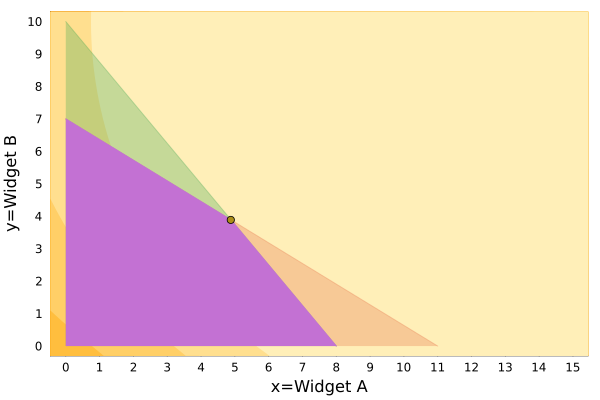

In [36]:
contour(x,y,(x,y)->-f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true,
width=800,height=600)
# title!("Feasible region and extreme points")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.3)
areaplot!(x[x.<=8], (80 .- 10*x[x.<=8])./8, legend=false, opacity=0.3)
areaplot!([8;0;4.888], [0;7;3.888], legend=false, opacity=1.0)
# scatter!([0 8 0 4.88],[0 0 7 3.888])
# scatter!([0],[0]) 
# scatter!([0],[7])
scatter!([4.88],[3.888])



## Optimal solution

In this case, the **optimal solution** or the point $(x^{*}, y^{*})$ which maximizes our objective function occurs at the intersection of the material and time constraints, given by solving the simple linear system:

$$
\begin{align}
10 x + 8 y = & \ 80 \\
7 x + 11 y = & \ 77
\end{align}
$$

Since we have two equations and two unknowns (decision variables x and y), we can solve this system of equations using linear algebra. 

First, we reformulate the above equations in matrix format as:

$$
\begin{align}
\begin{bmatrix}
10 & 8\\
7 & 11
\end{bmatrix} 
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
80\\
77
\end{bmatrix}
\end{align}
$$

Thus, we can find the vector $[x,y]^\mathbf{T}$ by taking the inverse of the coefficient matrix $\mathbf{A}$ times the right hand side matrix ($\mathbf{b}$) 
$$
\begin{align}
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
10 & 8\\
7 & 11
\end{bmatrix}^{-1} 
\begin{bmatrix}
80\\
77
\end{bmatrix}
\end{align}
$$

In [37]:
sol = [10 8; 7 11]\[80;77]

2-element Vector{Float64}:
 4.88888888888889
 3.888888888888888

Using the optimal values $x^*=4.8889$ and $y^*=3.8889$, we can calculate the optimal revenue:

In [38]:
f(sol[1],sol[2])

1413.888888888889

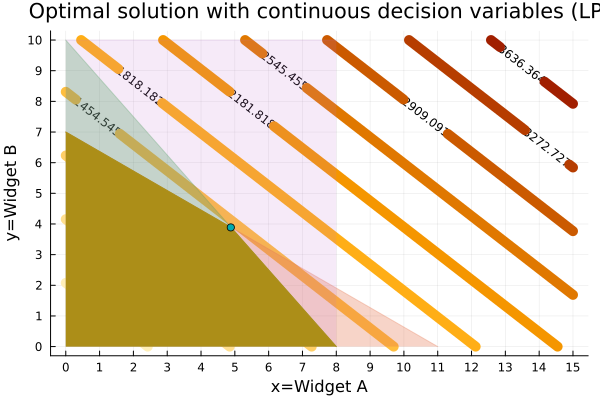

In [39]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("Optimal solution with continuous decision variables (LP)")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.3)
areaplot!(x[x.<=8], (80 .- 10*x[x.<=8])./8, legend=false, opacity=0.3)
areaplot!(x[x.<=8], repeat([maximum(y)],length(x[x.<=8])), legend=false, opacity=0.15)
areaplot!([8;0;4.888], [0;7;3.888], legend=false, opacity=1.0)
scatter!([4.88], [3.888])

## Binding and nonbinding constraints

What happened to the capacity constraint on A ($x\leq8$)? 

We can see that the constraint is satified at the optimal solution ($x^{*}=4.889$). As we discussed above, the capacity constraint was redundant given the addition of the time constraint. But we can also see that at this optimal solution, the constraint is not satisfied at equality&mdash;that is $x^{*}$ is strictly $<8$. We thus say the capacity constraint on widget A is **non-binding**.

In contrast, both the time and material constraints are **binding**&mdash;that is, at the optimal solution $x^*=4.8889$ and $y^*=3.8889$, both constraints are satisfied at equality:

$$
\begin{align}
10 x^{*} + 8 y^{*} = & \ 80 \\
7 x^{*} + 11 y^{*} = & \ 77
\end{align}
$$

## Discrete variables

Finally, we now consider that we can only produce and sell whole numbers of widgets. (There is no market for half of an A.) In this example, we make the (perhaps unreasonable) assumption that we cannot carry over some partially produced widget to the next week. Our latest solution with all the constraints results in the following non-integer (continuous) solution:
- 4.889 units of A
- 3.889 units of B

If we further require that $x$ and $y$ must be integers, we have a **discrete** set of decision variables, and the problem becomes more complicated. (In this case, we have in fact a **mixed-integer linear program**, because we have discrete decision variables, and all are related by linear constraints and a linear objective.)

The final mixed-integer linear optimization problem can be described as:

$$
\begin{align}
\max \ & 150 x + 175 y \\
\text{s.t.} & \\
& 10 x + 8 y \leq \ 80 \\
& 7 x + 11 y \leq \ 77 \\
& x \leq 8 \\
& x \geq 0 \\
& y \geq 0 \\
& \text{x, y integer}
\end{align}
$$

The solution is given by:
- 3 units of A
- 5 units of B

With revenue:

In [40]:
f(3,5)

1325

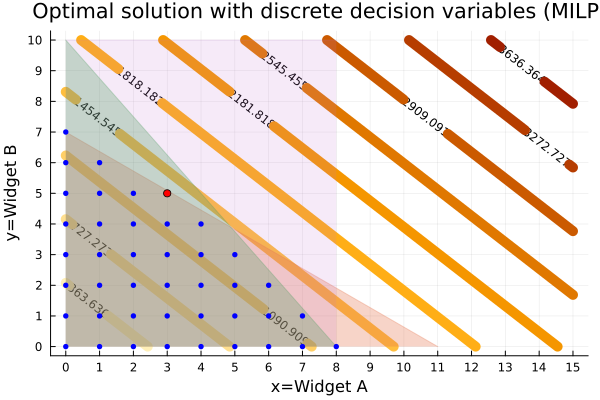

In [41]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("Optimal solution with discrete decision variables (MILP)")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.3)
areaplot!(x[x.<=8], (80 .- 10*x[x.<=8])./8, legend=false, opacity=0.3)
areaplot!(x[x.<=8], repeat([maximum(y)],length(x[x.<=8])), legend=false, opacity=0.15)
#areaplot!([8;0;4.888], [0;7;3.888], legend=false, opacity=1.0)
# display feasible discrete points
scatter!([repeat([0],8)],[0:7], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([1],7)],[0:6], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([2],6)],[0:5], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([3],6)],[0:5], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([4],5)],[0:4], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([5],4)],[0:3], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([6],3)],[0:2], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([7],2)],[0:1], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([8,],[0], markerstrokewidth=0,markersize=3, markercolor="blue")
# optimal solution
scatter!([3], [5], markercolor="red")

We can see that the optimal solution with discrete decision variables still lies within the feasible region defined by the constraints, but it is not at an extreme point (as was the case when decision variables could take on continuous values). 

It is provable that the optimal solution to an MILP lies at an integer point within the polygon defined by the extreme points of the continuous problem (or the **convex hull** of the continuous problem), and that the discrete solution will only occur at an extreme point when the optimal extreme point happens to be an integer point. 

For this reason, we can say that the continuous solution is an approximation of the discrete solution when certain decision variables are restricted to discrete (or integer) values. In fact, the optimal solution to an LP (maximization) with the same constraint set can be used as an **upper bound** for the optimal MILP solution, such that the optimal MILP solution is always $\leq$ the optimal LP solution, and will only be strictly equal when the LP solution occurs at a value that satisfies all integrality constraints (e.g. all discrete decisions are equal to integer values).

We will discuss solution methods for mixed-integer linear programs in a future notebook, but they leverage this ability to use a simpler linear program (or **linear relaxation** of the MILP problem) as an upper bound approximation of the discrete MILP solution. A linear relaxation of an MILP problem retains the same set of constraints and objective, but “relaxes” the requirement that certain variables take discrete values to allow for continuous variables, making the problem an LP.

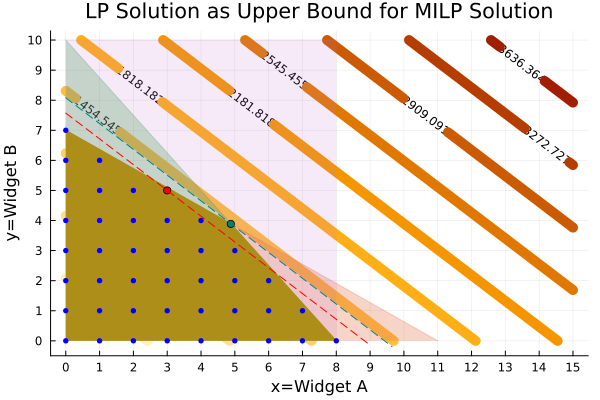

In [42]:
contour(x,y,(x,y)->f(x,y),nlevels=10, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
title!("LP Solution as Upper Bound for MILP Solution")
xaxis!("x=Widget A")
yaxis!("y=Widget B")
xticks!(0:maximum(x))
yticks!(0:maximum(y))
areaplot!(x[x.<=11], (77 .- 7*x[x.<=11])./11, legend=false, opacity=0.3)
areaplot!(x[x.<=8], (80 .- 10*x[x.<=8])./8, legend=false, opacity=0.3)
areaplot!(x[x.<=8], repeat([maximum(y)],length(x[x.<=8])), legend=false, opacity=0.15)
# LP feasible region
areaplot!([8;0;4.888], [0;7;3.888], legend=false, opacity=1.0)
# display feasible discrete points
scatter!([repeat([0],8)],[0:7], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([1],7)],[0:6], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([2],6)],[0:5], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([3],6)],[0:5], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([4],5)],[0:4], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([5],4)],[0:3], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([6],3)],[0:2], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([repeat([7],2)],[0:1], markerstrokewidth=0,markersize=3, markercolor="blue")
scatter!([8,],[0], markerstrokewidth=0,markersize=3, markercolor="blue")
# Optimal discrete solution
scatter!([3], [5], markercolor="red")
# Optimal LP solution
scatter!([4.88], [3.888], markercolor="teal")
lp_optimal(x) = (1413.8889-150x)/175
milp_optimal(x) = (1325-150x)/175
plot!(lp_optimal,0,9.65, color="teal", linestyle=:dash)
plot!(milp_optimal,0,9, color="red", linestyle=:dash)

## Why optimization?

Optimization problems are a useful mathematical approach to understand many practical, real-world challenges in which we want to know the "best" way to do something, where "best" can be clearly defined algebraically to be either maximized or minimized, and where we face a finite set of decisions and constraints limitating the feasible set of decisions one can take.

Examples of optimization problems abound. Here's a partial list of practical, real-world examples across many domains (many of these are adapted from [here](https://www.solver.com/examples-optimization-problems)):

**Engineering**
- Design an aircraft wing design deciding on length and materials section to meet weight restrictions and strength requirements and to *maximize* flight distance given a limited fuel load
- Decide on the diameter, material, and number and configuration of pipes in a counterflow heat exchanger to *maximize* heat transfer rate given limited volumetric dimensions
- Design traffic signal timing to *minimize* average vehicle delay at a series of intersections along a traffic corridor or across a grid of urban streets
- Select the optimal hub height, rotor diameter, and placement of wind turbines in a wind farm to *maximize* expected revenue at a specific site given several scenarios for projected electricity price and wind speed time series

**Corporate Finance**

- Working Capital Management: Invest in 1-month, 3-month, and 6-month CDs to *maximize* interest while meeting cash requirements
- Capital Budgeting:  Choose a combination of capital projects to *maximize* overall  NPV (Net Present Value)
- Cash Management:  Determine where to locate lockboxes to *minimize* the "float" or interest lost to due mailing delays
- Capacity Planning:  Determine which plants should be opened or closed at which locations to *maximize* profit and meet demand for products
 
**Investments**
 
- Portfolio Optimization - Markowitz Model:  Allocate limited funds to stocks to *minimize* risk for a target rate of return - with known or computed variances and covariances
- Stock Portfolio Management:  optimize a limited budget across several possible scenarios to *minimize* risk at different target rates of return
- Portfolio Optimization - Sharpe Model (CAPM):  Calculate alphas and betas for stocks relative to a market index, then uses these to find an efficient portfolio given limited budget that *maximizes* expected return over a given time frame
 
**Production**

- Product Mix:  Determine how many products of each type to assemble from certain parts to *maximize* profits while not exceeding available parts inventory
- Machine Allocation:  Allocate production of a product to different machines, with different capacities, startup cost and operating cost, to meet production target at *minimum* cost
- Blending:  Determine which raw materials from different sources to blend to produce a substance with certain desired qualities at *minimum* cost
- Process Selection - Decide which of several processes (with different speeds, costs, etc.) should be used to make a desired quantity of product in a certain amount of time, at *minimum* cost
- Cutting Stock:  Determine how to cut larger pieces of wood, steel, etc. into smaller pieces of desired sizes, each needed in certain quantities, to *minimize* waste
 
**Distribution**

- Transportation Model:  Determine how many products to ship from each factory to each warehouse, or from each factory to each warehouse and direct to each end customer, to *minimize* shipping cost while meeting warehouse demands and not exceeding factory supplies
- Multi-Level, Multi-Commodity Transportation Model:  Determine how many products of several different types to ship from each factory to each warehouse and each customer, to *minimize* total shipping cost while meeting demands and not exceeding capacities and supplies
- Partial Loading - Decide which sizes or types of products to load into a vehicle, given its size limits, to best meet demand or to *minimize* wasted space
- Facility Location:  Determine which (if any) plants to close to *minimize* total costs, including fixed operating costs and shipping costs between facilities
- Production / Transportation Model:  Determine how many products to produce in each factory and ship to warehouses and customers, to *minimize* overall costs while meeting demands, warehouse capacities and factory supplies
- Delivery Routing: Plan routes to deliver all scheduled packages and *minimize* cost of fuel, labor, and vehicle wear and tear across a fleet of delivery vehicles
 
**Purchasing**

- Contract Awards - Award contracts to suppliers who have bid certain prices to supply products to facilities in several states to meet needed output at *minimum* cost
- Inventory Stocking/Reordering:  Plan inventory stocking and reordering policies to meet expected demand and *maximize* profit without exceeding available warehouse space
- Media Planning - Decide how much advertising to purchase in different media to *minimize* total cost while achieving a target level of reach or frequency
- Purchasing / Transportation Model:  Determine how much to purchase from different suppliers at specified prices, to be shipped from their locations to various plants, to *minimize* total costs including purchase and shipping costs
 
**Human Resources**

- Crew Scheduling:  Assign crews to different airline flight segments to *minimize* total cost while ensuring that a crew "rotation" begins and ends in the same city
- Office Assignment:  Assign employees to available offices to *maximize* satisfaction of employee preferences
- Employee Scheduling:  Schedule employees for weekly "shifts" (five works days plus two consecutive days off) to *minimize* payroll costs while meeting varying demand for each day of the week, optionally taking into account employee seniority and preferences
- Workforce Composition: Decide how many employees to retrain, hire and fire to meet changing workforce composition requirements while *minimizing* costs or employee turnover
- Workforce Movement:  Decide how many troops to move from several camps to several other bases, to *minimize* movement time or total cost
 
***Examples by Industry***
 
**Airlines and Trucking**
 
- Crew Scheduling:  Given a flight schedule, aircraft assignments, and restrictions on duty periods, allocate crews most effectively to flights to *maximize* revenue or *minimize* cost to meet specified demand
- Fleet Routing and Assignment:  Determine which aircraft to fly on each route, and the sequence of segments flown by each aircraft to *maximize* revenue or *minimize* cost to meet specified demand
- Revenue Management:  For different classes of tickets, determine how many seats to sell or hold back as flight date approaches to *maximize* total revenue on scheduled flights
 
**Oil and Gas**
 
- Gasoline Blending: From hydrocarbons with specific octane ratings, vapor pressure, volatility and cost, determine how much of each should be blended together to produce regular, midgrade, and premium gasoline and *maximize* revenue
- Gas Contract Purchase:  With forecasted but uncertain demand for gas, determine which contracts to buy, and how much gas to store at different times to *maximize* expected revenue
- Pipeline Capacity Auction:  Determine which bids, at different prices, should be awarded to *maximize* sales revenue while not exceeding daily pipeline capacity
 
**Lumber, Paper and Steel**
 
- Cutting Stock Problems:  Given large wood / paper sheets or steel slabs / bars, and demand for units of smaller lengths/widths, determine the cutting pattern of large into small pieces that meets demand while *minimizing* waste or *maximizing* total revenue given different prices for different dimenions of cut product
 
**Agriculture**

- Crop Planning:  Given forecasted crop prices and growing conditions, determine how much of each crop to plant to *maximize* expected revenue
- Feed Blending:  Given the nutritional requirements for feed animals and the price of available feeds, find the blend of feed ingredients that will *minimize* total cost
 
**Financial Services**

- Efficient Portfolios:  Given forecasts of stock, bond or asset class returns, variances and covariances, allocate funds to investments to *minimize* portfolio risk for a given rate of return
- Index Fund Management:  Solve a portfolio optimization problem that *minimizes* "tracking error" for a fund mirroring an index composed of thousands of securities
- Asset/Liability Management:  Allocate funds to various investments to *maximize* portfolio return while ensuring that periodic liabilities are fully funded
 
As you can see, optimization problems are all around us, and learning how to formulate optimization problems, code algebraic models to represent these problems, and use off-the-shelf 'solvers' to find optimal solutions is a useful skill set!

Any time you need to *maximize* or *minimize* a given objective while making a finite set of decisions subject to a finite set of constraints, you're facing an optimization problem. Or, whenever facing a problem that can be described algebraically as:

$$
\begin{align}
\min f(x) &\text{ or }\max f(x)\\
\text{subject to:}&\\
g_j(x) &\geq a_j \quad \forall j \in M\\
h_k(x) & = b_k \quad \forall k \in N\\
\end{align}
$$

## Electricity sector problems

In this course, we will focus on a set of 'canonical' optimization problems encountered in the electricity sector, as examples of the kind of optimization problems encountered in energy systems engineering and electric power systems.

Those problems include:

1. **Capacity expansion planning** (simplified): Decide the mix of investments in different available electricity generation resources to meet all levels of expected demand over the course of a year and *minimize* total cost including capital investment cost, fixed operations and maintenance costs, variable operation and maintenance costs, and fuel costs


2. **Economic dispatch**: Decide how to dispatch a fleet of power plants (and energy storage devices) to meet electricity demand in every time period (e.g. hour or five min period) and *minimize* total cost or electricity production, subject to engineering related inter-temporal constraints on power plants or energy storage devices (e.g. hourly changes in power output, storage state of charge limits)


3. **Unit commitment**: Decide which thermal power plants to turn on ('commit') or off ('shut down') and how to operate them over the next 24 hours to meet expected electricity demand and *minimize* total cost of electricity production (including start-up related fuel use and maintenance) subject to engineering related constraints (e.g. minimum stable output levels of commited units, minimum time between start-up and shut-down) and reliability constraints (e.g., reserve requirements)


4. **Optimal power flow**: Determine how to dispatch a fleet of power plants (and energy storage devices) to meet electricity demand in every time period (e.g. hour or five min period) and at every location across an electricity transmission network to *minimize* total cost of electricity production, subject to engineering related constraints on power plant or energy storage devices and network power flows (e.g. Kirchhoff's circuit laws)


5. **Capacity expansion planning** (detailed): Decide the mix of investments in different available electricity generation resources and transmission network expansion and commitment and dispatch of generators and storage to meet all levels of expected demand over the course of a year and *minimize* total cost subject to inter-temporal constraints on generator and storage dispatch, unit commitment constraints, and network power flow constraints

## Types of optimization problems

In this course, we will focus primarily on two particular types or classes of optimization problems known as **[linear programming](https://en.wikipedia.org/wiki/Linear_programming)** problems (LPs) and **[mixed integer linear programming](https://en.wikipedia.org/wiki/Linear_programming#Integer_unknowns)** problems (MILPs). We actually saw examples of both types of problems already above in the simple Factory example.


***Linear programming*** problems seek to maximize or minimize a linear cost or 'objective' function:

$\sum_{i=1}^n c_i x_i$ 

(or in vector notation, $\mathbf{c}'\mathbf{x}$)

subject to a set of linear constraints of the form: 

$$
\begin{align}
\sum_{i=1}^n a_{i,j} x_i &\leq b_j\\
\sum_{i=1}^n a_{i,j} x_i &\geq b_j \quad \text{or}\\
\sum_{i=1}^n a_{i,j} x_i &= b_j\\
\end{align}
$$

Or, in vector notation:

$$
\begin{align}
\mathbf{a_j}'\mathbf{x} & \leq b_j\\
\mathbf{a_j}'\mathbf{x} & \geq b_j\\
\mathbf{a_j}'\mathbf{x} & = b_j\\
\end{align}
$$

and where $x_i \in \mathbf{R}$ or where all decision variables are continuous, real number values.

We may additionally constrain certain variables to be $\geq$ or $\leq0$&mdash;non-negativity or negativity constraints&mdash;to reflect certain physical realities (that we can't produce negative widgets, for example). Note that non-negativity constraints can be treated as a special example of generalized inequality constraints of the form $\sum_{i=1}^n a_{i} x_i \geq b$ described above where $b=0$ and where coefficients $a_{i} = 0$ for all but the specific $x_i$ variable for which the non-negativity or negativity constraint applies. (Negativity constraints can be achieved by reversing the sign of the inequality.)



***Mixed integer linear programming*** problems seek to maximize or minimize a linear cost or 'objective' function subject to linear constraints but where decisions variables include a mix of both continuous decisions ($x_i \in \mathbf{R}$) *and* discrete (integer or binary) values ($y_i \in \mathbf{Z}$).

The Factory Example earlier in this notebook provided examples of both LP and MILP problems.


**Other types of optimization problems**:

There are [many other types of optimization problems](https://neos-guide.org/content/optimization-tree-alphabetical), each with a unique mathematical structure that lends itself to different computational solution methods, including:

- *Quadratic programming* problems (QP) which combine a quadratic objective function and linear constraints.
- *Quadratically constrained quadratic programming* problems (QCQP) which combine a quadratic objective function and quadratic constraints.
- *Second order conic programming* problems (SOCP) in which a linear objective function is minimized over the intersection of an affine (linear) set and the product of quadratic or 'second-order' cones.
- *Semidefinite programming* (SDP) problems in which a linear objective function is minimized subject to a linear matrix inequality

And many others...

Note that all of the above are **[convex optimization problems](https://en.wikipedia.org/wiki/Convex_optimization)** in which a convex objective function is minimized or maximized subject to a set of [convex](https://en.wikipedia.org/wiki/Convex_polygon) constraints and continuous decision variables. One of the most important qualities of convex optimization problems is that it is provable that *every local optimum is also a global optimum*. Each convex class of problems above (along with LP problems) has well developed, specialized solution algorithms to find the optimal solution in finite, albeit [polynomial time](https://en.wikipedia.org/wiki/Time_complexity#:~:text=great%20practical%20importance.-,Polynomial%20time,for%20some%20positive%20constant%20k). In practice, we may wait for an algorithm to terminate on the optimal solution (e.g., linear programs), or we may be quite happy with near-optimal solutions defined by a small solution tolerance.

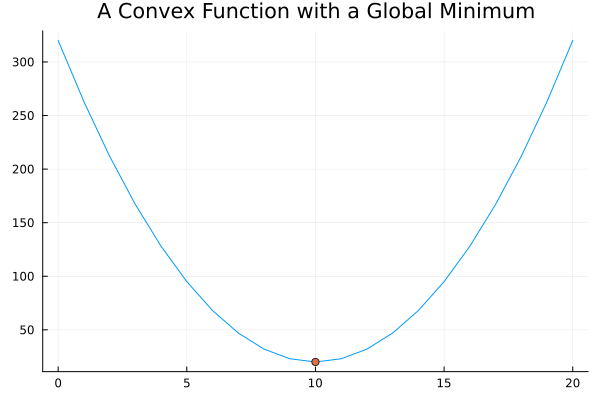

In [43]:
convexfn(d) = 3* (d-10)^2 + 20
plot(convexfn, 0:20, legend=false,)
title!("A Convex Function with a Global Minimum")
scatter!([10], [20])

**Non-convex optimization problems** have either a [non-convex](https://en.wikipedia.org/wiki/Concave_polygon) objective function or non-convex constraints, which can result in many local maxima or minima (think of the valleys or peaks of different heights as you traverse a mountain range). A variety of computational methods exist to find one or more local optima to non-convex problems, but short of an exhaustive search, it is generally not possible to guarantee that any of the local optima are the maximum or minimum possible values that could be obtained across the entire feasible region (the global optimum), making these problems more difficult to tackle computationally than convex problems. 

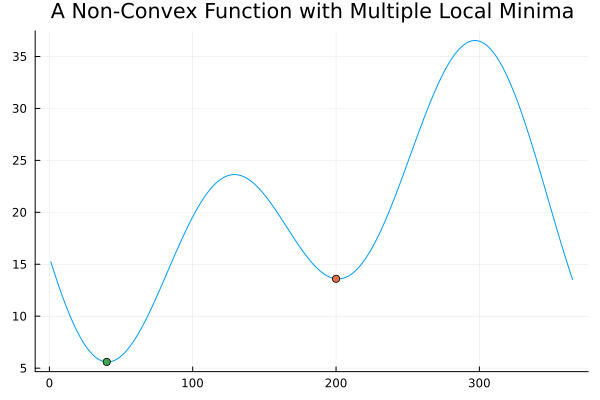

In [44]:
nonconvex(d) = -7.65 * sind(d) + 9.87 * sind(2d + 206) + 20
plot(nonconvex, 1:365, legend=false,)
title!("A Non-Convex Function with Multiple Local Minima")
scatter!([200], [13.6])
scatter!([40], [5.6])

**Note: The remainder of this course will focus on linear and mixed integer linear problems.**